Date: 21 April 2021

Going to try out a few more things

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import math

# Upload modules for 
1. NeuronLayerx
2. NeuronNetwork classes and
3. Simulation function


In [ ]:
from google.colab import files

data_upload = files.upload()

for file_name in data_upload.keys():
  print(f"{file_name} has been uploaded, with length {len(data_upload[file_name])}")

Saving functions_multi_neuron.py to functions_multi_neuron.py
Saving functions_sim.py to functions_sim.py
Saving neuron_layer.py to neuron_layer.py
Saving neuron_network.py to neuron_network.py
functions_multi_neuron.py has been uploaded, with length 181
functions_sim.py has been uploaded, with length 10698
neuron_layer.py has been uploaded, with length 13019
neuron_network.py has been uploaded, with length 4425


In [ ]:
from neuron_layer import NeuronLayerX
from neuron_network import NeuronNetwork
from functions_sim import *

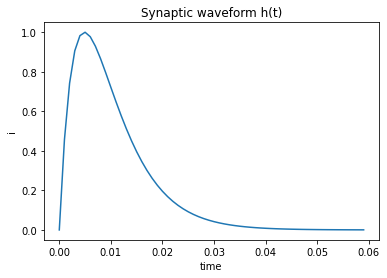

In [ ]:
dt = 1e-3
tau1 = 6e-3 # in ms
tau2 = 4e-3
duration = 10*max(tau1, tau2) # 10 times the longest time constant
t = np.arange(0, duration, dt)
synaptic_waveform = np.exp(-t/tau1)-np.exp(-t/tau2)
synaptic_waveform = synaptic_waveform/np.amax(synaptic_waveform)
plt.plot(t, synaptic_waveform)
plt.xlabel("time")
plt.ylabel("i")
plt.title("Synaptic waveform h(t)")
plt.show()

In [ ]:
import warnings

def phase_t(v1, v2, vth):
  """
  v1, v2 are arrays with voltage as a function of time
  """
  phi1 = 360*v1/vth
  phi2 = 360*v2/vth

  phi_diff = phi1-phi2

  return phi_diff


In [ ]:
w_cross = 2
w_self = -2
i_ext = 1.5
N = 500
vth = 1

In [ ]:
outputs = run_simulation_noisy(w_cross, w_self, i_ext, synaptic_waveform,N, noise_var=0.2,v_initial=np.array([0, 0.2]).reshape((2,1)))
v, s = outputs["voltage"], outputs["spike"]

In [ ]:
v.shape

(500, 2)

In [ ]:
phi_all = phase_t(v[:,0], v[:,1], 0.61)

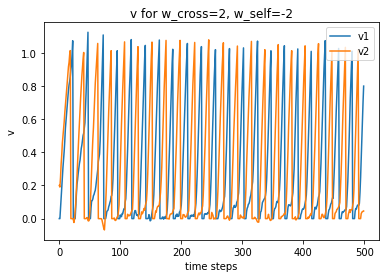

In [ ]:
plt.plot(v[:,0])
plt.plot(v[:,1])
plt.title("v for w_cross="+ str(w_cross)+", w_self="+str(w_self))
plt.xlabel("time steps")
plt.ylabel("v")
plt.legend(["v1", "v2"])
plt.show()

In [ ]:
def plot_phi_t(s, w_cross, w_self, noise_var):
  dph, ph1, ph2 = get_phase_t(s[:,0], s[:,1])
  plt.plot(dph)
  plt.plot(ph1)
  plt.plot(ph2)
  plt.legend(["del_phi", "phi1", "phi2"])
  plt.xlabel("time (ms)")
  plt.ylabel("phase (deg)")
  plt.title("phi(t) for w_cross="+str(w_cross)+", w_self="+str(w_self)+", iext=N(1.5, "+str(noise_var)+")")
  plt.show()

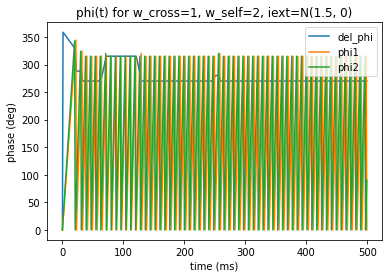

In [ ]:
plot_phi_t(s,w_cross, w_self, 0)

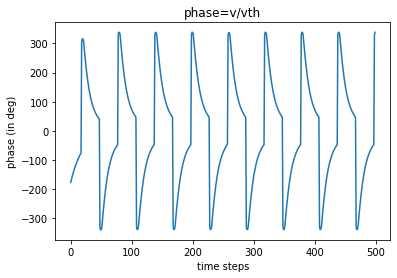

In [ ]:
plt.plot(phi_all)
plt.title("phase=v/vth")
plt.xlabel("time steps")
plt.ylabel("phase (in deg)")
plt.show()

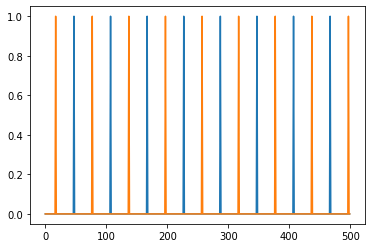

In [ ]:
plt.plot(s[:,0])
plt.plot(s[:,1])

In [ ]:
np.argwhere(s[:,0])

array([[ 47],
       [107],
       [167],
       [227],
       [287],
       [347],
       [407],
       [467]])

In [ ]:
np.argwhere(s[:,1])

array([[ 17],
       [ 77],
       [137],
       [197],
       [257],
       [317],
       [377],
       [437],
       [497]])

In [ ]:
np.argwhere(s)[:,0]

array([ 17,  47,  77, 107, 137, 167, 197, 227, 257, 287, 317, 347, 377,
       407, 437, 467, 497])

In [ ]:
s[:,0]/(1+s[:,1])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

idea for phase:

1. start with the first spiking neuron
2. Observe the time difference between n2-spike from n1-spike as a fraction of the interval between successive n2-spikes

In [ ]:
(1+1)%2

0

In [ ]:
def phase_t_using_spikes(spikes0, spikes1):
  """
  spikes0, spikes1 are arrays with voltage as a function of time
  """
  #first find the neuron which spikes first
  spiketimes0 = np.argwhere(spikes0)
  spiketimes1 = np.argwhere(spikes1)
  if len(spiketimes0)>len(spiketimes1):
    spiketimes0 = spiketimes0[:len(spiketimes1)]
  elif len(spiketimes1)>len(spiketimes0):
    spiketimes1 = spiketimes1[:len(spiketimes0)]
  #print(max_spikes)3
  
  spikes_all = [spiketimes0, spiketimes1] # a LIST

  if np.min(spiketimes0)<=np.min(spiketimes1):
    # 0 has spiked first
    spiked_first = 0
  else:
    spiked_first=1
  
  #create two arrays: interneuron spike differences and intra neuron spike differences for first spiked neuron.
  spike_diff_interneuron = spikes_all[(spiked_first+1)%2]-spikes_all[spiked_first]
  inter_spike_interval = spikes_all[spiked_first]-np.roll(spikes_all[spiked_first],1) #to get successive differences (ignore the last element)
  inter_spike_interval[-1] = inter_spike_interval[-2] # keep same as previous

  phi_diff = 360*spike_diff_interneuron/inter_spike_interval 


  return phi_diff, spikes_all


In [ ]:
phi, spkall = phase_t_using_spikes(s[:,0], s[:,1])

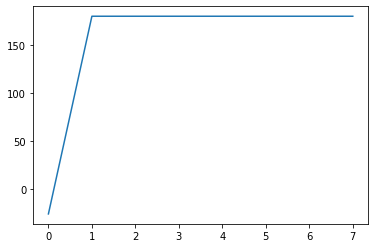

In [ ]:
plt.plot(phi)

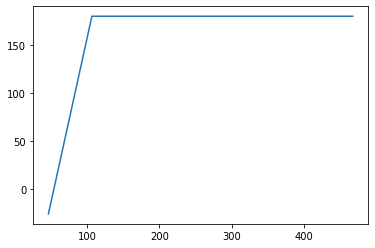

In [ ]:
plt.plot(spkall[0], phi)

In [ ]:
outputs = run_simulation(w_cross, w_self, i_ext, synaptic_waveform,N, v_initial=np.array([0.1, 0.3]).reshape((2,1)))
v, s = outputs["voltage"], outputs["spike"]
phi= phase_t_using_spikes(s[:,0], s[:,1])